# Analyzing A Movie Review Dataset[100 Points]

## 0. Text Preprocessing [10 Points]

Read through this tutorial on kaggle [here](
https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words) , to
familiarize yourself with its python tools and workflow. You'll have to download "labeledTrainData.tsv" and "testData.tsv" from [here](https://www.kaggle.com/c/word2vec-nlp-tutorial/data). Please remember to add your GT_UserName in the author function below.

In [1]:
def author(gt_username = 'tpasumarthi3'):
    print("This assignment is submitted by {0}.".format(gt_username))

#Add your GT_UserName below and uncomment the line.
author()


This assignment is submitted by tpasumarthi3.


In [2]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import scipy as sp
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from copy import deepcopy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import pairwise_distances

In [3]:
# Reading in the data
train = pd.read_csv("labeledTrainData.tsv", delimiter="\t")
test = pd.read_csv("testData.tsv", delimiter="\t")

In [4]:
def preprocess_review(review):
    """Helper function to clean the reviews.

     Arg: review: review text.
     Returns: clean_review : Cleaned reviews

     You should carry out the following steps.
     1. Remove HTML Tags.
     2. Remove non-letter characters.
     3. Convert to lower case.
     4. Remove stopwords.
    """

    #Write your code below
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    #nltk.download('stopwords')
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))
    
    return clean_review


In [5]:
#Clean the reviews and add them to the list below
cleaned_reviews = []

#Write your code below.
num_reviews = train["review"].size 
for i in range(num_reviews):
    cleaned_reviews.append(preprocess_review( train["review"][i] ))

    
#Clean the test reviews and add them to the list below
cleaned_test_reviews = []

#Write your code below.
num_test_reviews = test["review"].size 
for i in range(num_test_reviews):
    cleaned_test_reviews.append(preprocess_review( test["review"][i] ))

## 1. Processing Text to create Design Matrices [15 Points]

In [6]:
def design_matrix(cleaned_reviews):
    """ Generate the 4 design matrices X_counts, X_binary, X_tfidf, X_binary_imbalance.

      Args: cleaned_reviews: Cleaned Reviews.
      Returns:
            X_counts: Design Matrix X_counts.
            X_binary: Design Matrix X_binary(Use the X_counts to generate this.)
            X_tfidf:  Design Matrix X_tfidf
            X_binary_imbalance: Design Matrix X_binary_imbalance(use fraction 0.75)
            imbalance_train: Skewed training set(use fraction 0.75)




    """
    
    #Write your code below 
    #Create X_counts
    vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, \
                                 stop_words = None, max_features = 5000) 
    X_counts = vectorizer.fit_transform(cleaned_reviews)
    X_counts = X_counts.toarray()
    
    #create X_binary
    X_binary= np.copy(X_counts)
    X_binary[X_binary > 0] = 1
    #print(X_binary[0].sum())
    #print(X_counts[0].sum())
    
    #create X_tfidf
    transformer = TfidfTransformer(smooth_idf=False)
    X_tfidf= transformer.fit_transform(X_counts)
    X_tfidf= X_tfidf.toarray()
    #print(X_tfidf[0].sum())
    
    #create list of indexes to be deleted for the imbalanced design matricies
    np.random.seed(0)
    idxs= np.array(train.index[train['sentiment'] == 1].tolist())
    np.random.shuffle(idxs)
    split=int(len(idxs)*.75)
    del_idxs=idxs[0:split]
    #tee=del_idxs
    #print(np.sort(tee))
    
    #create X_binary_imbalance
    X_binary_imbalance= np.delete(X_binary,del_idxs, axis=0)
    #print(X_binary_imbalance[0].sum())
    
    #create imbalance_train
    imbalance_train=train.copy()
    imbalance_train.drop(imbalance_train.index[list(del_idxs)],inplace=True)
    imbalance_train.reset_index(inplace=True, drop=True)
    #print(imbalance_train)
    
    return X_counts,X_binary,X_tfidf,X_binary_imbalance,imbalance_train

In [7]:
X_counts,X_binary,X_tfidf,X_binary_imbalance,imbalance_train= design_matrix(cleaned_reviews)

In [8]:
X_counts

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
X_binary

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
X_binary_imbalance

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## 2. Feature Space Similarity Experiment [25(5 + 5 + 15) Points]

In [12]:
# Obtain the label on the original train set and imbalance train set
train_sentiment = train["sentiment"].values
imbalance_train_sentiment = imbalance_train["sentiment"].values

In [13]:
def dist(X, i, j, distance_function = "euclidean"):
    """The distance function returns the (Euclidean) distance between rows i and j of a design matrix.
     Args: X : Design Matrix
           i,j: row IDs
           distance_function: The distance function to be used. Here we are using euclidean
     Returns: The distance between row i and row j.
  
    """
    #Write your code here.
    r1=X[i]
    r2=X[j]
    d=r2-r1
    d=d*d
    distance=d.sum()
    distance=np.sqrt(distance)

    return distance

In [14]:
def topk(X, k):
    """The topk(X, k) function returns ((i1,j1,d1),...(ik,jk,dk)) where (ix,jx) are the indices of the xth 
     closest pair, and dx is the corresponding distance. You can break ties randomly.
     Args: X : Design Matrix
           k:  Top k
     Returns: top: A list of [row,col,distance]
  
    """
   
    #Write your code here.
    dm=pairwise_distances(X)
    shape= dm.shape
    tri_idx=np.triu_indices(dm.shape[0],1)
    dm=dm[tri_idx]
    idx= np.argpartition(dm, k)[:k]
    vals=dm[idx]
    idx=np.array(tri_idx).T[idx]
    top= np.vstack([idx[:,0],idx[:,1],vals]).T
    
    return top

Use topk() to find the closest review pairs for each design matrix and print the following: the indices of the reviews, the distance, the first 20 characters of each review, the labels for each review.

In [15]:
# compute top k for X_counts matrix and print the following: the indices of the reviews, the distance, the first 20 characters of each review, the labels for each review.
#Write your code here.


close_k= topk(X_counts,5)
for ck in close_k:
    i,j,d= ck
    ichars= train["review"][i][0:20]
    jchars= train["review"][j][0:20]
    isent= train["sentiment"][i]
    jsent= train["sentiment"][j]
    print("index_i: ",i)
    print("index_j: ",j)
    print("distance: ",d)
    print("i_characters: ",ichars)
    print("j_characters: ",jchars)
    print("i_sent: ",isent)
    print("j_sent: ",jsent)
    print()

index_i:  4543.0
index_j:  12168.0
distance:  0.0
i_characters:  Smallville episode J
j_characters:  Smallville episode J
i_sent:  1
j_sent:  1

index_i:  6035.0
index_j:  18501.0
distance:  0.0
i_characters:  Corridors of time. T
j_characters:  Corridors of time. T
i_sent:  0
j_sent:  0

index_i:  7765.0
index_j:  9776.0
distance:  0.0
i_characters:  How has this piece o
j_characters:  How has this piece o
i_sent:  0
j_sent:  0

index_i:  612.0
index_j:  10730.0
distance:  0.0
i_characters:  There is no reason t
j_characters:  There is no reason t
i_sent:  0
j_sent:  0

index_i:  2893.0
index_j:  12983.0
distance:  0.0
i_characters:  If you want Scream o
j_characters:  If you want Scream o
i_sent:  1
j_sent:  1



In [16]:
# compute top k for X_binary matrix and print the following: the indices of the reviews, the distance, the first 20 characters of each review, the labels for each review.
#Write your code here.

close_k= topk(X_binary,5)
for ck in close_k:
    i,j,d= ck
    ichars= train["review"][i][0:20]
    jchars= train["review"][j][0:20]
    isent= train["sentiment"][i]
    jsent= train["sentiment"][j]
    print("index_i: ",i)
    print("index_j: ",j)
    print("distance: ",d)
    print("i_characters: ",ichars)
    print("j_characters: ",jchars)
    print("i_sent: ",isent)
    print("j_sent: ",jsent)
    print()

index_i:  4723.0
index_j:  9740.0
distance:  0.0
i_characters:  This movie got off t
j_characters:  This movie got off t
i_sent:  0
j_sent:  0

index_i:  3256.0
index_j:  23321.0
distance:  0.0
i_characters:  You do realize that 
j_characters:  You do realize that 
i_sent:  0
j_sent:  0

index_i:  5519.0
index_j:  14734.0
distance:  0.0
i_characters:  'Dead Letter Office'
j_characters:  'Dead Letter Office'
i_sent:  0
j_sent:  0

index_i:  2018.0
index_j:  6396.0
distance:  0.0
i_characters:  I find it rather use
j_characters:  I find it rather use
i_sent:  0
j_sent:  0

index_i:  14104.0
index_j:  22961.0
distance:  0.0
i_characters:  I like a lot of the 
j_characters:  I like a lot of the 
i_sent:  0
j_sent:  0



In [17]:
# compute top k for X_tfidf matrix and print the following: the indices of the reviews, the distance, the first 20 characters of each review, the labels for each review.
#Write your code here.

close_k= topk(X_tfidf,5)
for ck in close_k:
    i,j,d= ck
    ichars= train["review"][i][0:20]
    jchars= train["review"][j][0:20]
    isent= train["sentiment"][i]
    jsent= train["sentiment"][j]
    print("index_i: ",i)
    print("index_j: ",j)
    print("distance: ",d)
    print("i_characters: ",ichars)
    print("j_characters: ",jchars)
    print("i_sent: ",isent)
    print("j_sent: ",jsent)
    print()

index_i:  1461.0
index_j:  6013.0
distance:  0.0
i_characters:  I really enjoyed thi
j_characters:  I really enjoyed thi
i_sent:  1
j_sent:  1

index_i:  15426.0
index_j:  21441.0
distance:  0.0
i_characters:  As a low budget ente
j_characters:  As a low budget ente
i_sent:  1
j_sent:  1

index_i:  2465.0
index_j:  16917.0
distance:  0.0
i_characters:  God, I was bored out
j_characters:  God, I was bored out
i_sent:  0
j_sent:  0

index_i:  15290.0
index_j:  18042.0
distance:  0.0
i_characters:  This show comes up w
j_characters:  This show comes up w
i_sent:  0
j_sent:  0

index_i:  8255.0
index_j:  19847.0
distance:  0.0
i_characters:  After losing the Emm
j_characters:  After losing the Emm
i_sent:  1
j_sent:  1



In [18]:
# compute top k for X_binary_imbalance matrix and print the following: the indices of the reviews, the distance, the first 20 characters of each review, the labels for each review.
#Write your code here.

close_k= topk(X_binary_imbalance,5)
for ck in close_k:
    i,j,d= ck
    ichars= imbalance_train["review"][i][0:20]
    jchars= imbalance_train["review"][j][0:20]
    isent= imbalance_train["sentiment"][i]
    jsent= imbalance_train["sentiment"][j]
    print("index_i: ",i)
    print("index_j: ",j)
    print("distance: ",d)
    print("i_characters: ",ichars)
    print("j_characters: ",jchars)
    print("i_sent: ",isent)
    print("j_sent: ",jsent)
    print()

index_i:  3109.0
index_j:  4747.0
distance:  0.0
i_characters:  When i got this movi
j_characters:  When i got this movi
i_sent:  0
j_sent:  0

index_i:  7741.0
index_j:  15495.0
distance:  0.0
i_characters:  This film was so ama
j_characters:  This film was so ama
i_sent:  0
j_sent:  0

index_i:  2054.0
index_j:  5849.0
distance:  0.0
i_characters:  In 1993, \the visito
j_characters:  In 1993, \the visito
i_sent:  0
j_sent:  0

index_i:  9658.0
index_j:  14492.0
distance:  0.0
i_characters:  What was an exciting
j_characters:  What was an exciting
i_sent:  0
j_sent:  0

index_i:  7745.0
index_j:  10662.0
distance:  0.0
i_characters:  The story and the sh
j_characters:  The story and the sh
i_sent:  0
j_sent:  0



Are the pairs always the same?

A: No they are not always the same. They are only the same for X_counts and X_binary. They are different for X_tfidf and X_binary_imbalanced

## 3. Classification Experiment [35 Points]

Now you’re going to tune an SVM classifier using each design matrix, and measure the
resultant performance. Read the sklearn [docs](http://scikit-learn.org/stable/modules/cross_validation.html) on cross-validation to see the
methods to use.
*   Set your rng seed to 0 and create an initial learning_set / test_set split of 80-20.
*   Now we want to use a linear SVM (svm.SVC with kernel=linear) and pick the best C value for our classifier.
*   Repeat for each of the four design matrices:
  *  Repeat 30 times:
    *  Pick a random value of C uniformly in the interval (1e-4, 1e4).
    *  Use 5-fold cross-validation to train the SVM.
    *  Estimate and record the F1-Score.
  *  Select the value of C which produced the best F1-Score and find out the F1-Score on the test set using that C.
  *  Retrain the classifier using the entire learning set with this C value.
  *  Submit test set predictions to Kaggle (see the section in the blog, and
make sure you use their test data. You may need to retrain one more
time using all “training data”). Print your Kaggle score.

In [19]:
import matplotlib.pyplot as plt
import random as rd

from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, KFold

### 3.1 Utility Functions [10 (5 + 5) Points]

In [20]:
def calculateF1(X, y, k = 5):
    """calculateF1(X, y, k = 5) return two list which record all randomly selected c(in the interval (1e-4, 1e4))
     and corresponding F1 scores.

     Args: X: Features
           y: Label of sentiment
           k: Number of Cross-validation

     Returns: c_list: List of all c values.
              f1_list: Corresponding F1 Scores.
    """
    rd.seed(0) #Setting a common seed

    #Write your code here.
    cv= KFold(n_splits= k)
    c_list= []
    f1_list= []
    
    for i in range(30):
        c= rd.uniform(-4, 4)
        c= 10**c
        f1=0
        clf= svm.LinearSVC(C= c)
        
        for train, test in cv.split(X, y):
            clf.fit(X[train], y[train])
            y_pred = clf.predict(X[test])
            temp_f1 = f1_score(y[test], y_pred)
            f1 = f1+temp_f1
            
        f1=f1/k
        c_list.append(c)
        f1_list.append(f1)
        
    return c_list, f1_list

In [21]:
def findBestC(X, y, k = 5):
    """findBestC(X, y, k) return the best performance c, and the improvement(difference between best and worst f1_scores)/
     Args: X: Features
           y: Label of sentiment
           k: Number of Cross-validation
     Returns: c_best: C value with best f1_score.
              improvement: difference between best and worst f1_score.
    """
    c_list, f1_list= calculateF1(X, y,k)
    best_idx= np.argmax(f1_list)
    worst_idx= np.argmin(f1_list)
    c_best=c_list[best_idx]
    improvement= f1_list[best_idx]-f1_list[worst_idx]     
    
    return c_best,improvement

### 3.2 Tune an SVM classifier using X_counts [20 (4*5) Points]

#### 3.2.0 Utility Function

In [22]:
def findImprovement(X,train_sentiment,test_size = 0.2, random_state = 0):
    """ Find the improvement in F1-Score of the design Matrix(X) using previous utility functions and the test_f1_score using the best C.

      Args: X: Design Matrix
            train_sentiment: Sentiments of the training data
            test_size: Split it as 80:20
            random_state: Seed

      Returns:
            c_best: The best possible c value
            improvement: improvement in F1-Score using the design Matrix(X).
            f1_s: Test F1 Score.
            

      You should carry out the following Steps:
      1. Split the data using the above parameters.
      2. Find out the best c and the improvement. (use 5-fold Cross Validation.)
      3. Find out the test f1 score with this c.
    """
    #Write your code here.
    X_train, X_test, y_train, y_test= train_test_split(X,train_sentiment, test_size = 0.2, random_state = 0)
    c_best, improvement= findBestC(X_train, y_train, 5)
    clf= svm.LinearSVC(C = c_best)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    f1_s= f1_score(y_test, y_pred)

    return c_best,improvement,f1_s

#### 3.2.1 Tune an SVM classifier using X_counts



In [36]:
#Print the improvement using X_counts and the test f1_score using the best c.
#Write your code here.
import warnings
warnings.filterwarnings('ignore')

c_best,improvement,f1_s= findImprovement(X_counts,train_sentiment,test_size = 0.2, random_state = 0)
print("c_best: ",c_best)
print("improvement: ",improvement)
print("f1_s: ",f1_s)

c_best:  0.010093707860257255
improvement:  0.053691953325930575
f1_s:  0.8756299133239266


In [37]:
# Retrain the classifier using the entire learning set with c_best
#Write your code here.
xc_clf= svm.LinearSVC(C = c_best)
xc_clf.fit(X_counts, train_sentiment)

LinearSVC(C=0.010093707860257255, class_weight=None, dual=True,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
     tol=0.0001, verbose=0)

Submit test set predictions to Kaggle (see the section in the blog, and
make sure you use their test data. You may need to retrain one more
time using all “training data”). Print your Kaggle scores.

In [38]:
#You should do the following steps.
#1. Create bag of words from the test data.
#2. Generate the labels using that test data.
#3. Save the results to the pandas dataframe. For format check the blog.
#4. Submit the results to Kaggle and add the scores here.

#Write your code here.
X_counts_test, X_binary_test, X_tfidf_test, X_binary_imbalance_test, imbalance_test= design_matrix(cleaned_test_reviews)
xc_pred= xc_clf.predict(X_counts_test)
xc_output= pd.DataFrame(data={"id":test["id"], "sentiment":xc_pred})
xc_output.to_csv("xcounts.csv", index=False)

#Uncomment the below lines and add your score.
X_counts_result = 0.54072
print("The Kaggle Score using X_counts is {}".format(X_counts_result))

The Kaggle Score using X_counts is 0.54072


#### 3.2.2 Tune an SVM classifier using X_binary

In [39]:
#Print the improvement using X_binary and the test f1_score using the best c.
#Write your code here.
c_best,improvement,f1_s= findImprovement(X_binary,train_sentiment,test_size = 0.2, random_state = 0)
print("c_best: ",c_best)
print("improvement: ",improvement)
print("f1_s: ",f1_s)

c_best:  0.010093707860257255
improvement:  0.055924091917174956
f1_s:  0.8713509160459029


In [40]:
# Retrain the classifier using the entire learning set with c_best
#Write your code here.
xb_clf= svm.LinearSVC(C = c_best)
xb_clf.fit(X_binary, train_sentiment)

LinearSVC(C=0.010093707860257255, class_weight=None, dual=True,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
     tol=0.0001, verbose=0)

In [41]:
#Use the the same steps as you did for X_counts and print the kaggle score. Please note that you need to find X_binary_test using the X_counts_test.
#Write your code here.
xb_pred= xb_clf.predict(X_binary_test)
xb_output= pd.DataFrame(data={"id":test["id"], "sentiment":xb_pred})
xb_output.to_csv("xbinary.csv", index=False)


#Uncomment the below lines and add your score.
X_binary_result = 0.55152
print("The Kaggle Score using X_binary is {}".format(X_binary_result))

The Kaggle Score using X_binary is 0.55152


#### 3.2.3 Tune an SVM classifier using X_tf_idf

In [42]:
#Print the improvement using X_tf_idf and the test f1_score using the best c.
#Write your code here.
c_best,improvement,f1_s= findImprovement(X_tfidf,train_sentiment,test_size = 0.2, random_state = 0)
print("c_best: ",c_best)
print("improvement: ",improvement)
print("f1_s: ",f1_s)

c_best:  0.173569374988568
improvement:  0.06279354208338983
f1_s:  0.888083735909823


In [43]:
# Retrain svm using all X_tfidf data
#Write your code here.
xt_clf= svm.LinearSVC(C = c_best)
xt_clf.fit(X_tfidf, train_sentiment)

LinearSVC(C=0.173569374988568, class_weight=None, dual=True,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
     tol=0.0001, verbose=0)

In [44]:
#Use the the same steps as you did for X_counts and print the kaggle score. Please note that you need to find X_tfidf_test using the X_counts_test.

#Write your code here.
xt_pred= xt_clf.predict(X_tfidf_test)
xt_output= pd.DataFrame(data={"id":test["id"], "sentiment":xt_pred})
xt_output.to_csv("xtfidf.csv", index=False)


#Uncomment the below lines and add your score.
X_tfidf_result = 0.56943
print("The Kaggle Score using X_tfidf is {}".format(X_tfidf_result))

The Kaggle Score using X_tfidf is 0.56943


#### 3.2.4 Tune an SVM classifier using X_binary_imbalance

In [45]:
#Print the improvement using X_binary_imbalance and the test f1_score using the best c.
#Write your code here.
c_best,improvement,f1_s= findImprovement(X_binary_imbalance,imbalance_train_sentiment,test_size = 0.2, random_state = 0)
print("c_best: ",c_best)
print("improvement: ",improvement)
print("f1_s: ",f1_s)

c_best:  0.01797640132539557
improvement:  0.21287935039895012
f1_s:  0.7214225232853515


In [46]:
# Retrain svm using all X_binary_imbalance data.
#Write your code here.
xbi_clf= svm.LinearSVC(C = c_best)
xbi_clf.fit(X_binary_imbalance, imbalance_train_sentiment)

LinearSVC(C=0.01797640132539557, class_weight=None, dual=True,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
     tol=0.0001, verbose=0)

In [47]:
#Use the the same steps as you did for X_counts and print the kaggle score.

#Write your code here.
xbi_pred= xbi_clf.predict(X_binary_test)
xbi_output= pd.DataFrame(data={"id":test["id"], "sentiment":xbi_pred})
xbi_output.to_csv("xbi.csv", index=False)


#Uncomment the below lines and add your score.
X_binary_imbalance_result = 0.51752
print("The Kaggle Score using X_binary_imbalance is {}".format(X_binary_imbalance_result))

The Kaggle Score using X_binary_imbalance is 0.51752


Which design matrix performed best (e.g., which encoding method worked best)?

A: X_tfidf performed the best, as it had the best test accuracy. 

What was the lift (improvement in F1-Score) between the worst and best cases for each experiment?

A: <br>
1) X_count: 0.0536129817027462<br>
2) X_binary: 0.055924091917174956<br>
3) X_tfidf: 0.062375758495022526<br>
4) X_counts: 0.21287935039895012

##4. Learning Curve Experiment [15(10 + 5) Points]

Using a logistic regression classifier and the design matrix X_counts, generate a learning curve:
*  Set your rng seed to 0 and create an initial learning_set / test_set split of 80-20.
*  Generate a learning curve (xval vs training error) for n=(100, 500, 1000, 2000,3000, 4000, 5000, 7500, 10000, 15000, 20000) training instances.
*  Interpret the learning curve.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve

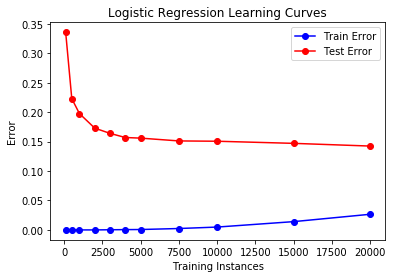

In [49]:
training_instances = [100, 500, 1000, 2000, 3000, 4000, 5000, 7500, 10000, 15000, 20000]
#Use the learning_curve module to generate mean train and test scores and plot them with X-axis being the number of training instances and Y-axis.
#Please add appropriate title,labels and legends.

#Write your code here.
val, trs, tes= learning_curve(LogisticRegression(), X_counts, train_sentiment, cv = 5, train_sizes = training_instances)
tr_error= 1-np.mean(trs, axis= 1)
te_error= 1-np.mean(tes, axis= 1)

plt.plot(training_instances, tr_error, 'o-', label = "Train Error", color = "b")
plt.plot(training_instances, te_error, 'o-', label = "Test Error", color = "r")
plt.title("Logistic Regression Learning Curves")
plt.xlabel("Training Instances")
plt.ylabel("Error")
plt.legend()
plt.show()

##### Please provide an explanation to the nature of your graph in the above experiment.

The training error starts off near 0, then increases as the training size increases, whereas the the test error starts off high and decreases as the training size increases. This is becasue when there are few data points, the regression model can be skewed by outliers or even data points being differently distributed than the whole set of data points. This leads to high test errors as the model can be overfit to the training set and fails to generalize. However, as the number of data points increases, they tend to be more indicicative of the whole set, and so the testing error comes down, and since more points are incorporated into training, the training error rises as a linear svm has a tougher time coming up with the seperation boudary to fit all points. Therefore the training and testing errors seem to be converging.